In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions     # use this library to plot 'decision_boundary'.

In [2]:
df = pd.DataFrame()

In [3]:
# let's create our own data-

df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

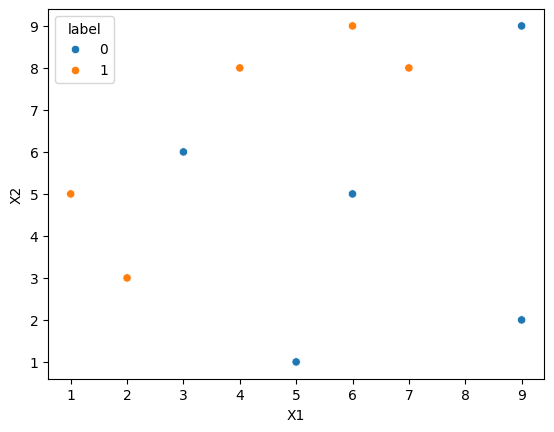

In [5]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [6]:
# At starting,for finding the weight, we divide (1/n) and assign this weight to each of the rows.
# where, n -> no. of rows in the dataset. 

df['weights'] = 1 / df.shape[0] 

In [7]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
# make an object for 'DecisionTreeClassifier' and also make sure that (max_depth=1) 
# because in 'Adaboost',the D.T we use, it's "decision_stump".

# Decision Stump :- is simply a very simple Decision Tree —> a tree with only one split (i.e., max_depth = 1).
# So, it has 1 root node and 2 leaf nodes (branches).

dt1 = DecisionTreeClassifier(max_depth=1)

In [10]:
# Extracting the rows and columns:- 

X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [11]:
# Step 2:-  train our 1st model

dt1.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

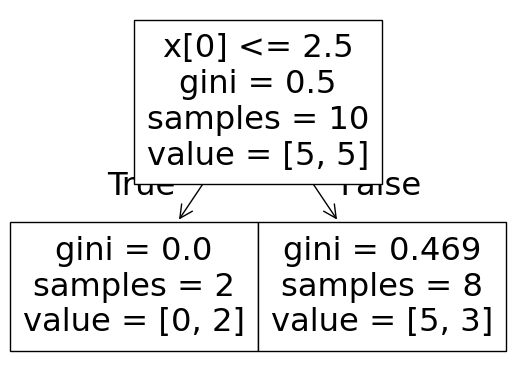

In [12]:
# let's see our decision stump :-

from sklearn.tree import plot_tree

plot_tree(dt1)

<Axes: >

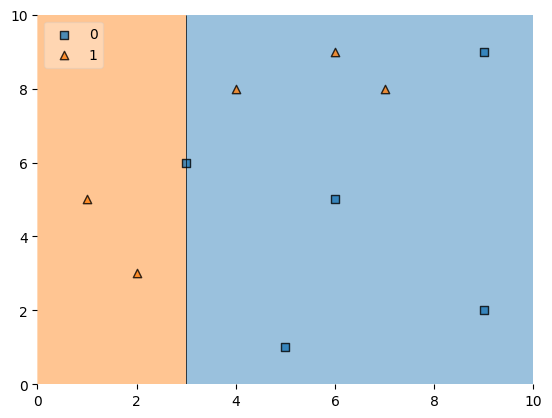

In [13]:
# plotting the 'decision_boundary' for above dataset. 

plot_decision_regions(X, y, clf=dt1, legend=2)

# so,yha pe yeh 3 gltiya kr rha hai,because yha pe 3 red points blue wale region mein hai.

In [14]:
# so, find the prediction on the whole dataset.

df['y_pred'] = dt1.predict(X)

In [15]:
df   

# so by comparing, we can easily check from here that 'how many mistakes' our model done here for this data.

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [16]:
# so,again from this data,we can easily see that there is 3 mistakes is there.(3 predictionns are wrong).

In [17]:
# So,now we calculate the weightage of decision stump of our model using the formula -> (1/2)ln(1-error/error).
# where, 'error' is sum of the weights of the "misclassified rows".

# then, our total error will be = (0.1 + 0.1 + 0.1) = 0.3

def calculate_model_weight(error):

    return 0.5*np.log((1-error)/(error))

In [18]:
# Step 3:- Calculate model weight

alpha1 = calculate_model_weight(0.3)   # we calculate the alpha1(weight) for our 1st model.
alpha1

0.42364893019360184

In [19]:
# Step 4:- Update weights
# here,we do step of "upsampling" i.e., whenever we have correctly classified rows,then,we decreases the weight of that rows.
# And, the rows which are misclassified,then we just increase the weights of that row.
# so,that we can easily pass the mistakes of our present model to next model.

def update_row_weights(row,alpha=0.423):

    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [20]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)

In [21]:
df    

# so,we can see,there is increment in the weight for misclassified rows and decrement for correctly classified rows. 

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [22]:
df['updated_weights'].sum()    # because we have to make it sure that it's total sum=1.

# we have to do something to make it's value = 1.
# so,we have to do 'normalization' for that, i.e., divide by 0.9165 to each 'updated_weight' values.

0.9165153319682015

In [23]:
df['normalized_weights'] = df['updated_weights'] / df['updated_weights'].sum()

In [24]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [25]:
df['normalized_weights'].sum()   # now, we get the total sum = 1.

1.0

<h4> Now, we have to create "Range" for this- </h4>

In [26]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])    # for creating an 'upper_range'.  

In [27]:
df['cumsum_lower'] = df['cumsum_upper'] -  df['normalized_weights']   # for creating a 'lower_range'

In [28]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]    # here,we get 'Upper_Range' and 'Lower_Range'

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [29]:
# So, our next task is to make a 'new_dataset' using exisiting one (in which same no. of rows is there as in previous have). 
# for this we generate 10 random numbers,and we check that in which ranges that '10 random numbers' will dropped.
# And,we pick that rows in which that they are dropped.

In [30]:
# So that's why we generate a function, which generate random numbers and add them into the lists.

def create_new_dataset(df):

    indices = [] 

    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows(): 
            if row['cumsum_upper'] > a and a > row['cumsum_lower']: 
                indices.append(index)
                
    return indices            

In [31]:
# so through this we will get the row no.

index_values = create_new_dataset(df)

index_values 

# we can see here, weights of that rows is increased where mistakes happened.
# And,this is the process which we called "upsampling".

[7, 6, 7, 9, 3, 8, 6, 6, 2, 7]

In [32]:
# Now, we are going to create 2nd dataframe,which takes 4 columns only(and rest similar to previous one)


second_df = df.iloc[index_values, [0,1,2,3]]

In [33]:
second_df

# keep in mind that in 'new_dataframe' for next stage, our weights is again initialized from 0.1.(b/c we already done the 'upsampling').

,X1,X2,label,weights
7,7,8,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
9,9,2,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
7,7,8,1,0.1


In [34]:
# Now, Again we construct a 2nd D.T and train it on data of the 'new_dataframe'

dt2 = DecisionTreeClassifier(max_depth=1)

In [35]:
# extracting rows and columns

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [36]:
# train the model

dt2.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.625, 0.5, '  False')]

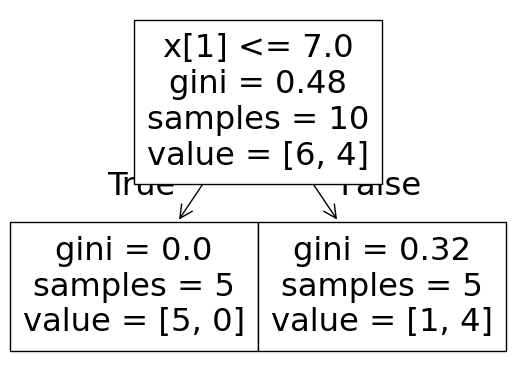

In [37]:
plot_tree(dt2)

<Axes: >

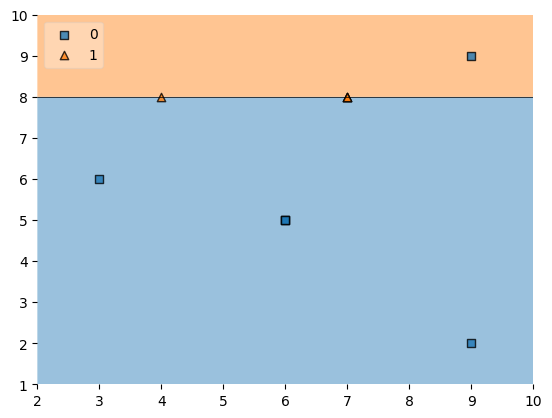

In [38]:
# plot its decision boundary - 

plot_decision_regions(X, y, clf=dt2, legend=2)

# so here,now it mistakes only for 1 point.

In [39]:
second_df['y_pred'] = dt2.predict(X)

In [40]:
second_df

# through this data,we can also confirm that here it's only 1 mistake happens.

,X1,X2,label,weights,y_pred
7,7,8,1,0.1,1
6,6,5,0,0.1,0
7,7,8,1,0.1,1
9,9,2,0,0.1,0
3,4,8,1,0.1,1
8,9,9,0,0.1,1
6,6,5,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
7,7,8,1,0.1,1


In [41]:
alpha2 = calculate_model_weight(0.1)   

In [42]:
alpha2      # here we calculate the value of alpha2 for our 2nd D.T

# so, it's weight is coming 1.098 (which is more than the previous one) because it does the least mistakes. 

1.0986122886681098

In [43]:
# Step 4 -> Update weights

def update_row_weights(row, alpha=1.09): 
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [44]:
second_df['updated_weights'] = second_df.apply(update_row_weights, axis=1)     

In [45]:
second_df    

# so,we can see only at 1 point where mistake is happened,only at that place value is changed.
# Rest of all the points are same.

,X1,X2,label,weights,y_pred,updated_weights
7,7,8,1,0.1,1,0.033622
6,6,5,0,0.1,0,0.033622
7,7,8,1,0.1,1,0.033622
9,9,2,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
8,9,9,0,0.1,1,0.297427
6,6,5,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
7,7,8,1,0.1,1,0.033622


In [46]:
# So, Again we have to normalize it - 

second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [47]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
7,7,8,1,0.1,1,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,1,0.297427,0.495694
6,6,5,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034


In [48]:
second_df['normalized_weights'].sum()    # it's addition becomes equal to 1.

0.9999999999999999

In [49]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [50]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [51]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
7,7,8,1,0.1,1,0.033622,0.056034,0.056034,0.000000
6,6,5,0,0.1,0,0.033622,0.056034,0.112068,0.056034
7,7,8,1,0.1,1,0.033622,0.056034,0.168102,0.112068
9,9,2,0,0.1,0,0.033622,0.056034,0.224136,0.168102
3,4,8,1,0.1,1,0.033622,0.056034,0.280170,0.224136
8,9,9,0,0.1,1,0.297427,0.495694,0.775864,0.280170
6,6,5,0,0.1,0,0.033622,0.056034,0.831898,0.775864
6,6,5,0,0.1,0,0.033622,0.056034,0.887932,0.831898
2,3,6,0,0.1,0,0.033622,0.056034,0.943966,0.887932
7,7,8,1,0.1,1,0.033622,0.056034,1.000000,0.943966


In [52]:
second_df[['X1','X2','label','weights','y_pred','normalized_weights','cumsum_lower','cumsum_upper']]

# so,this is our final 2nd stage dataframe.

,X1,X2,label,weights,y_pred,normalized_weights,cumsum_lower,cumsum_upper
7,7,8,1,0.1,1,0.056034,0.000000,0.056034
6,6,5,0,0.1,0,0.056034,0.056034,0.112068
7,7,8,1,0.1,1,0.056034,0.112068,0.168102
9,9,2,0,0.1,0,0.056034,0.168102,0.224136
3,4,8,1,0.1,1,0.056034,0.224136,0.280170
8,9,9,0,0.1,1,0.495694,0.280170,0.775864
6,6,5,0,0.1,0,0.056034,0.775864,0.831898
6,6,5,0,0.1,0,0.056034,0.831898,0.887932
2,3,6,0,0.1,0,0.056034,0.887932,0.943966
7,7,8,1,0.1,1,0.056034,0.943966,1.000000


In [53]:
# Now, after finding the 'Range', we have to generate again 10 random numbers. 
# And,then we creating index values.

index_values = create_new_dataset(second_df)
index_values

[8, 9, 8, 6, 2, 8, 3, 9, 7, 6]

In [54]:
# Now, we are going to create 3rd dataframe.

third_df = second_df.iloc[index_values, [0,1,2,3]]     # we use 1st 4 columns (same as second_df have) 
third_df
 
# becuase it is 'upsampled' now.

,X1,X2,label,weights
2,3,6,0,0.1
7,7,8,1,0.1
2,3,6,0,0.1
6,6,5,0,0.1
7,7,8,1,0.1
2,3,6,0,0.1
9,9,2,0,0.1
7,7,8,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1


In [55]:
# train for 3rd D.T

dt3 = DecisionTreeClassifier(max_depth=1)

X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

dt3.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


<Axes: >

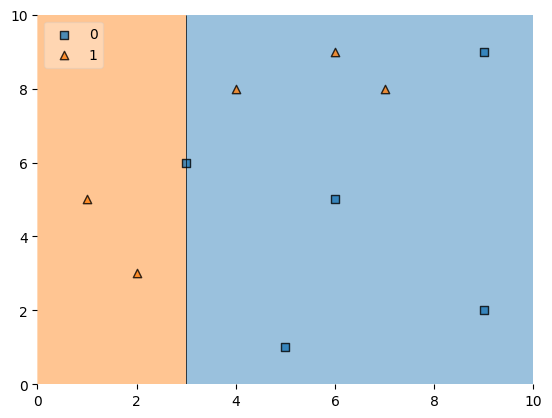

In [56]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [57]:
third_df['y_pred'] = dt3.predict(X)

In [58]:
third_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,1
7,7,8,1,0.1,1
2,3,6,0,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
2,3,6,0,0.1,0
9,9,2,0,0.1,0
7,7,8,1,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0


In [59]:
alpha3 = calculate_model_weight(0.7) 

In [60]:
alpha3

-0.4236489301936017

In [61]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


<h2> Prediction </h2>

In [62]:
# now it's time to do prediction:-

# Take any "query_point"(row) from the original dataframe and put it here to get it's original output.

In [63]:
# Let's this is 'query_point',so, predict it's o/p with each of the D.T :-

query = np.array([1,5]).reshape(1,2)  

In [64]:
dt1.predict(query)             # it predicts o/p=1, then we take '1' during finding the value of 'sign'

array([1], dtype=int64)

In [65]:
dt2.predict(query)             # it predicts o/p=1, then we take '1' during finding the value of 'sign'

array([0], dtype=int64)

In [66]:
dt3.predict(query)             # it predicts o/p=1, then we take '1' during finding the value of 'sign'

array([1], dtype=int64)

In [67]:
# during finding the value of 'sign', we take '1' for o/p=1 and take (-1) for o/p=0.

In [68]:
# so, for finding the value of 'sign' :-

alpha1*(1) + alpha2*(1) + alpha3*(1)

1.09861228866811

In [69]:
# Now, A/c to this find the value of the value of o/p:-

np.sign(1.09)   # it means that it's o/p=1. (Also in original dataframe,it's output is 1).

1.0

In [70]:
# Let's take another 'query_point' :- 

query = np.array([3,6]).reshape(1,2)

In [71]:
dt1.predict(query)     # it predicts o/p=1, then we take '1' during finding the value of 'sign'.

array([0], dtype=int64)

In [72]:
dt2.predict(query)      # it predicts o/p=0, then we take '0' during finding the value of 'sign'

array([0], dtype=int64)

In [73]:
dt3.predict(query)      # it predicts o/p=1, then we take '1' during finding the value of 'sign'

array([0], dtype=int64)

In [74]:
# so find the value of the 'sign':-

alpha1*(1) + alpha2*(-1) + alpha3*(1) 

-1.0986122886681096

In [75]:
np.sign(-1.098)    # (-ve) in the o/p sign shows that it's output=0.

-1.0

In [76]:
# So, our final output will be '0' for this 'query_point'.